El tema que se va a abordar en este proyecto es el precio de los teléfonos móviles.
Se va a intentar responder a la pregunta de si es correcto el precio que se esta pagando por un celular a juzgar por sus caracteristicas técnicas.

La idea es que personas que no tengan mucha noción de celulares pueden comparar el precio al que se les esta vendiendo el dispositivo con el precio que, en base a sus caracteristicas, en teoría este deberia tener y así poder buscar otras alternativas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv("/content/mobile phone specifications.csv")

In [2]:
data.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [3]:
data.shape

(1359, 22)

In [4]:
data.dtypes

Unnamed: 0                  int64
Name                       object
Brand                      object
Model                      object
Battery capacity (mAh)      int64
Screen size (inches)      float64
Touchscreen                object
Resolution x                int64
Resolution y                int64
Processor                   int64
RAM (MB)                    int64
Internal storage (GB)     float64
Rear camera               float64
Front camera              float64
Operating system           object
Wi-Fi                      object
Bluetooth                  object
GPS                        object
Number of SIMs              int64
3G                         object
4G/ LTE                    object
Price                       int64
dtype: object

In [5]:
data["Price"].mean()

11465.825607064018

In [6]:
data.isnull().sum()

Unnamed: 0                0
Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Operating system          0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Number of SIMs            0
3G                        0
4G/ LTE                   0
Price                     0
dtype: int64

In [7]:
data["Touchscreen"].value_counts()

Yes    1342
No       17
Name: Touchscreen, dtype: int64

In [8]:
data["Operating system"].value_counts()

Android       1299
Windows         19
iOS             17
Cyanogen        10
BlackBerry      10
Tizen            3
Sailfish         1
Name: Operating system, dtype: int64

In [9]:
data.drop(columns = ["Unnamed: 0"], inplace = True)

In [10]:
data

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12000,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6000,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,6000,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,Intex Aqua A2,Intex,Aqua A2,1500,4.00,Yes,480,800,4,512,...,5.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,2599
1355,Videocon Infinium Z51 Nova+,Videocon,Infinium Z51 Nova+,2000,5.00,Yes,480,854,4,1000,...,8.0,5.0,Android,Yes,Yes,Yes,2,Yes,No,2940
1356,Intex Aqua Y4,Intex,Aqua Y4,1700,4.50,Yes,480,854,2,512,...,5.0,2.0,Android,Yes,Yes,No,2,Yes,No,2999
1357,iBall Andi4 B20,iBall,Andi4 B20,1250,4.00,Yes,480,800,1,256,...,2.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,2498


In [11]:
data.drop(columns = ["Name", "Brand", "Model"], inplace = True)

In [12]:
data

,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,4085,6.67,Yes,1440,3120,8,12000,256.000,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,4000,6.50,Yes,1080,2400,8,6000,64.000,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,3969,6.50,Yes,1242,2688,6,4000,64.000,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3110,6.10,Yes,828,1792,6,4000,64.000,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4000,6.40,Yes,1080,2340,8,6000,128.000,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1500,4.00,Yes,480,800,4,512,8.000,5.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,2599
1355,2000,5.00,Yes,480,854,4,1000,8.000,8.0,5.0,Android,Yes,Yes,Yes,2,Yes,No,2940
1356,1700,4.50,Yes,480,854,2,512,4.000,5.0,2.0,Android,Yes,Yes,No,2,Yes,No,2999
1357,1250,4.00,Yes,480,800,1,256,0.512,2.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,2498


In [13]:
data["Wi-Fi"].value_counts()

Yes    1351
No        8
Name: Wi-Fi, dtype: int64

In [14]:
data["GPS"].value_counts()

Yes    1251
No      108
Name: GPS, dtype: int64

In [15]:
data.dtypes

Battery capacity (mAh)      int64
Screen size (inches)      float64
Touchscreen                object
Resolution x                int64
Resolution y                int64
Processor                   int64
RAM (MB)                    int64
Internal storage (GB)     float64
Rear camera               float64
Front camera              float64
Operating system           object
Wi-Fi                      object
Bluetooth                  object
GPS                        object
Number of SIMs              int64
3G                         object
4G/ LTE                    object
Price                       int64
dtype: object

In [16]:
data_prueba_replace = data["Operating system"].replace({"Cyanogen" : "Others", "BlackBerry" : "Others", "Tizen" : "Others", "Sailfish" : "Others"})

In [17]:
data_prueba_replace.value_counts()

Android    1299
Others       24
Windows      19
iOS          17
Name: Operating system, dtype: int64

In [18]:
data['Operating system'] = data["Operating system"].replace({"Cyanogen" : "Others", "BlackBerry" : "Others", "Tizen" : "Others", "Sailfish" : "Others"})

In [19]:
data["Operating system"].value_counts()

Android    1299
Others       24
Windows      19
iOS          17
Name: Operating system, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


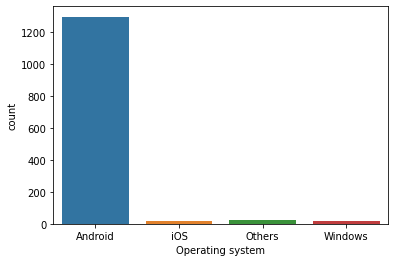

In [20]:
sns.countplot(data["Operating system"])

In [21]:
data.sample(10)

,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
878,2500,5.00,Yes,720,1280,4,2000,16.0,8.0,5.0,Android,Yes,Yes,Yes,1,Yes,Yes,4610
1156,2500,5.00,Yes,720,1280,4,2000,16.0,8.0,5.0,Android,Yes,Yes,Yes,2,Yes,Yes,4990
310,3000,5.65,Yes,720,1440,4,3000,16.0,13.0,13.0,Android,Yes,Yes,No,2,Yes,Yes,8480
1283,2910,5.50,Yes,720,1280,4,1000,8.0,8.0,2.0,Android,Yes,Yes,Yes,2,Yes,No,8499
1241,2500,5.50,Yes,720,1280,4,3000,16.0,13.0,5.0,Android,Yes,Yes,Yes,2,Yes,Yes,4790
853,1800,4.00,Yes,480,800,4,512,4.0,5.0,2.0,Android,Yes,Yes,No,1,Yes,Yes,2599
993,3200,5.50,Yes,1440,2560,8,3000,32.0,16.0,8.0,Android,Yes,Yes,Yes,1,Yes,Yes,11100
237,2070,4.50,Yes,720,1280,4,1000,8.0,5.0,1.3,Android,Yes,Yes,Yes,2,Yes,No,9999
1352,2100,5.00,Yes,854,480,4,1000,8.0,8.0,2.0,Android,Yes,Yes,Yes,2,Yes,No,3699
646,2600,5.00,Yes,540,960,8,1000,16.0,5.0,5.0,Android,Yes,Yes,Yes,2,Yes,Yes,5290


In [22]:
data["Price"] = data["Price"].apply(lambda x: x*0.012)

In [23]:
data.rename(columns = {"Price" : "Price (USD)"})

,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price (USD)
0,4085,6.67,Yes,1440,3120,8,12000,256.000,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,707.976
1,4000,6.50,Yes,1080,2400,8,6000,64.000,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,335.988
2,3969,6.50,Yes,1242,2688,6,4000,64.000,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,1282.800
3,3110,6.10,Yes,828,1792,6,4000,64.000,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,754.800
4,4000,6.40,Yes,1080,2340,8,6000,128.000,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,599.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1500,4.00,Yes,480,800,4,512,8.000,5.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,31.188
1355,2000,5.00,Yes,480,854,4,1000,8.000,8.0,5.0,Android,Yes,Yes,Yes,2,Yes,No,35.280
1356,1700,4.50,Yes,480,854,2,512,4.000,5.0,2.0,Android,Yes,Yes,No,2,Yes,No,35.988
1357,1250,4.00,Yes,480,800,1,256,0.512,2.0,0.3,Android,Yes,Yes,Yes,2,Yes,No,29.976


In [24]:
data["Touchscreen"] = data["Touchscreen"].apply(lambda x: 1 if x=="Yes" else 0)
data["Wi-Fi"] = data["Wi-Fi"].apply(lambda x: 1 if x=="Yes" else 0)
data["Bluetooth"] = data["Bluetooth"].apply(lambda x: 1 if x=="Yes" else 0)
data["GPS"] = data["GPS"].apply(lambda x: 1 if x=="Yes" else 0)
data["3G"] = data["3G"].apply(lambda x: 1 if x=="Yes" else 0)
data["4G/ LTE"] = data["4G/ LTE"].apply(lambda x: 1 if x=="Yes" else 0)

In [25]:
data.dtypes

Battery capacity (mAh)      int64
Screen size (inches)      float64
Touchscreen                 int64
Resolution x                int64
Resolution y                int64
Processor                   int64
RAM (MB)                    int64
Internal storage (GB)     float64
Rear camera               float64
Front camera              float64
Operating system           object
Wi-Fi                       int64
Bluetooth                   int64
GPS                         int64
Number of SIMs              int64
3G                          int64
4G/ LTE                     int64
Price                     float64
dtype: object

In [26]:
pd.get_dummies(data["Operating system"], prefix= "OS")

,OS_Android,OS_Others,OS_Windows,OS_iOS
0,1,0,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
1354,1,0,0,0
1355,1,0,0,0
1356,1,0,0,0
1357,1,0,0,0


In [27]:
dummies_OS = pd.get_dummies(data["Operating system"], prefix= "OS")

In [28]:
data = data.join(dummies_OS)

In [29]:
data.sample(8)

,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,...,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price,OS_Android,OS_Others,OS_Windows,OS_iOS
1215,2500,5.0,0,720,1280,4,2000,16.0,8.0,5.0,...,1,1,2,1,0,43.188,1,0,0,0
956,2800,5.2,1,720,1280,8,3000,16.0,13.0,5.0,...,1,1,2,1,1,180.312,1,0,0,0
36,3000,5.8,1,1440,2960,8,4000,64.0,12.0,8.0,...,1,1,2,1,1,323.988,1,0,0,0
405,2900,5.5,1,720,1280,8,2000,8.0,8.0,5.0,...,1,1,2,1,1,79.992,1,0,0,0
893,3000,5.5,1,1080,1920,4,4000,32.0,16.0,12.0,...,1,1,1,1,1,77.388,1,0,0,0
153,2000,2.4,0,240,320,2,512,4.0,2.0,0.3,...,1,1,1,0,1,14.988,0,1,0,0
1160,3300,5.5,1,720,1080,8,2000,16.0,13.0,5.0,...,1,1,2,1,1,161.400,1,0,0,0
1233,2200,5.0,1,720,1280,4,1000,8.0,13.0,5.0,...,1,1,2,1,1,35.400,1,0,0,0


In [30]:
data.dtypes

Battery capacity (mAh)      int64
Screen size (inches)      float64
Touchscreen                 int64
Resolution x                int64
Resolution y                int64
Processor                   int64
RAM (MB)                    int64
Internal storage (GB)     float64
Rear camera               float64
Front camera              float64
Operating system           object
Wi-Fi                       int64
Bluetooth                   int64
GPS                         int64
Number of SIMs              int64
3G                          int64
4G/ LTE                     int64
Price                     float64
OS_Android                  uint8
OS_Others                   uint8
OS_Windows                  uint8
OS_iOS                      uint8
dtype: object

In [31]:
data.drop(columns = "Operating system", inplace = True)

In [32]:
data.dtypes

Battery capacity (mAh)      int64
Screen size (inches)      float64
Touchscreen                 int64
Resolution x                int64
Resolution y                int64
Processor                   int64
RAM (MB)                    int64
Internal storage (GB)     float64
Rear camera               float64
Front camera              float64
Wi-Fi                       int64
Bluetooth                   int64
GPS                         int64
Number of SIMs              int64
3G                          int64
4G/ LTE                     int64
Price                     float64
OS_Android                  uint8
OS_Others                   uint8
OS_Windows                  uint8
OS_iOS                      uint8
dtype: object

In [33]:
data.sample(10)

,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,...,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price,OS_Android,OS_Others,OS_Windows,OS_iOS
624,4000,6.55,1,720,1600,8,4000,64.0,16.0,8.0,...,1,1,2,1,1,119.520,1,0,0,0
1155,2500,5.00,1,720,1280,4,1000,8.0,5.0,2.0,...,1,1,2,1,0,32.280,1,0,0,0
613,4500,6.70,1,1440,3200,8,8000,128.0,12.0,10.0,...,1,1,2,1,1,887.988,1,0,0,0
152,4000,5.99,1,1080,2160,8,3000,32.0,12.0,5.0,...,1,1,2,1,1,104.388,1,0,0,0
675,4000,6.19,1,720,1500,8,3000,32.0,13.0,8.0,...,1,0,2,1,1,83.880,1,0,0,0
1028,2000,5.00,1,720,1280,4,1000,8.0,8.0,2.0,...,1,1,2,0,1,83.880,1,0,0,0
1166,1200,4.00,1,480,800,2,512,4.0,2.0,0.3,...,1,1,2,1,0,23.988,1,0,0,0
1013,3000,5.50,1,1440,2560,4,4000,32.0,21.0,8.0,...,1,1,1,1,1,203.988,1,0,0,0
593,3000,5.86,1,720,1520,4,2000,16.0,13.0,5.0,...,1,1,2,1,1,53.988,1,0,0,0
601,2650,5.00,1,720,1280,4,2000,16.0,13.0,5.0,...,1,1,2,1,1,55.188,1,0,0,0


In [34]:
data.corr()

,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,...,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price,OS_Android,OS_Others,OS_Windows,OS_iOS
Battery capacity (mAh),1.000000,0.746886,0.118693,0.495362,0.573969,0.538017,0.600969,0.483489,0.499756,0.540250,...,0.028047,0.006549,0.040151,-0.084751,0.299965,0.297525,0.159993,-0.122897,-0.090659,-0.054305
Screen size (inches),0.746886,1.000000,0.156484,0.590146,0.709646,0.631984,0.707088,0.612804,0.581909,0.651781,...,0.031690,0.037301,0.037657,-0.061548,0.276154,0.402462,0.190163,-0.235596,-0.081944,0.014282
Touchscreen,0.118693,0.156484,1.000000,0.110885,0.144616,0.109661,0.103383,0.070374,0.092661,0.085684,...,-0.011890,0.040365,0.056120,0.068327,0.070743,0.050460,0.072496,-0.135707,0.013402,0.012668
Resolution x,0.495362,0.590146,0.110885,1.000000,0.920780,0.583203,0.687661,0.544791,0.506104,0.467119,...,0.024807,0.093022,-0.171891,0.023374,0.328109,0.540711,0.025065,-0.075334,-0.013046,0.056730
Resolution y,0.573969,0.709646,0.144616,0.920780,1.000000,0.642540,0.771964,0.640653,0.600198,0.585385,...,0.026446,0.087486,-0.134961,0.000790,0.340140,0.576152,0.048635,-0.114010,-0.027030,0.073770
Processor,0.538017,0.631984,0.109661,0.583203,0.642540,1.000000,0.615097,0.481688,0.468668,0.556287,...,0.042555,0.020472,0.039891,-0.044597,0.253804,0.302492,0.202394,-0.148148,-0.121223,-0.070463
RAM (MB),0.600969,0.707088,0.103383,0.687661,0.771964,0.615097,1.000000,0.847864,0.661602,0.696881,...,0.024635,0.020426,-0.023896,-0.054904,0.324121,0.613446,0.090089,-0.077371,-0.080965,0.010707
Internal storage (GB),0.483489,0.612804,0.070374,0.544791,0.640653,0.481688,0.847864,1.000000,0.572591,0.613574,...,0.033525,-0.008765,-0.015116,-0.074836,0.188652,0.644079,0.047525,-0.069348,-0.040457,0.037079
Rear camera,0.499756,0.581909,0.092661,0.506104,0.600198,0.468668,0.661602,0.572591,1.000000,0.639652,...,0.028387,0.009423,-0.038466,-0.020256,0.234148,0.379120,0.057388,-0.069004,-0.013756,-0.009765
Front camera,0.540250,0.651781,0.085684,0.467119,0.585385,0.556287,0.696881,0.613574,0.639652,1.000000,...,0.000637,0.035795,0.054066,-0.086578,0.242562,0.310672,0.125208,-0.100502,-0.093534,-0.013514


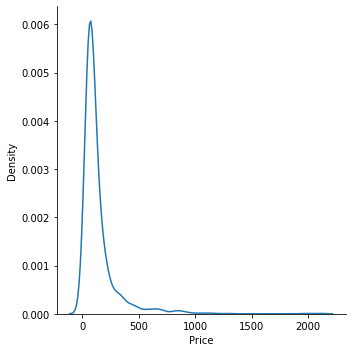

In [35]:
sns.displot(data["Price"], kind = "kde")
plt.savefig("Histograma Precio.jpg")

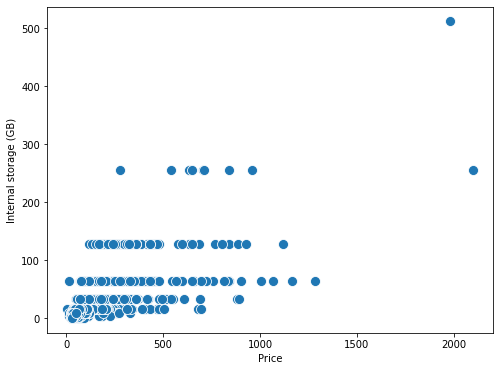

In [36]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=data, x="Price" , y="Internal storage (GB)", s=100)
plt.savefig("Dispersión.jpg")


Desde acá arranca el entrenamiento de los distintos modelos

In [37]:
#Regresión lineal

X = data.drop(columns="Price")
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 48)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1019, 20)
(1019,)
(340, 20)
(340,)


In [39]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model_lr.predict(X_test)
r2_score(y_test,y_pred)

0.3800677418226108

In [41]:
y_pred_train = model_lr.predict(X_train)
r2_score(y_train,y_pred_train)

0.598529009183548

In [42]:
model_lr.intercept_

118.35558554390218

In [43]:
model_lr_intercept_false = LinearRegression(fit_intercept = False)

In [44]:
model_lr_intercept_false.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [45]:
y_pred_intercept = model_lr_intercept_false.predict(X_test)
r2_score(y_test,y_pred_intercept)

0.3800677418226144

In [46]:
#KNN

model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [47]:
y_pred_knn = model_knn.predict(X_test)
r2_score(y_test,y_pred_knn)

0.3336334109032927

In [48]:
y_pred_TrainKnn = model_knn.predict(X_train)
r2_score(y_train,y_pred_TrainKnn)

0.6337479681215015

In [49]:
model_knn_8neighbors = KNeighborsRegressor(n_neighbors = 8)

In [50]:
model_knn_8neighbors.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [51]:
y_pred_knn8 = model_knn_8neighbors.predict(X_test)
r2_score(y_test,y_pred_knn8)

0.35597300511688046

In [52]:
#Estandarización de Datos
scaler = StandardScaler()

In [53]:
#Estandarizacion con Media y Desvio Estandar
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_train_std

array([[ 1.18297507, -0.44315236,  0.10916311, ..., -0.1263018 ,
        -0.10446386, -0.1180269 ],
       [ 0.5051153 ,  1.3179023 ,  0.10916311, ..., -0.1263018 ,
        -0.10446386, -0.1180269 ],
       [-1.18953415, -0.44315236,  0.10916311, ..., -0.1263018 ,
        -0.10446386, -0.1180269 ],
       ...,
       [-1.07655752, -0.44315236,  0.10916311, ..., -0.1263018 ,
        -0.10446386, -0.1180269 ],
       [ 0.05320878,  0.28455618,  0.10916311, ..., -0.1263018 ,
        -0.10446386, -0.1180269 ],
       [-1.30251078, -1.1708609 ,  0.10916311, ..., -0.1263018 ,
        -0.10446386, -0.1180269 ]])

In [54]:
X_test_std = scaler.transform(X_test)
X_test_std

array([[ 0.39213867,  0.57563959,  0.10916311, ..., -0.1263018 ,
        -0.10446386, -0.1180269 ],
       [ 1.26205871,  0.28455618,  0.10916311, ..., -0.1263018 ,
        -0.10446386, -0.1180269 ],
       [ 0.39213867,  0.28455618,  0.10916311, ..., -0.1263018 ,
        -0.10446386, -0.1180269 ],
       ...,
       [ 1.18297507, -0.44315236,  0.10916311, ..., -0.1263018 ,
        -0.10446386, -0.1180269 ],
       [ 1.18297507,  1.57987738,  0.10916311, ..., -0.1263018 ,
        -0.10446386, -0.1180269 ],
       [-0.17274448, -0.15206895,  0.10916311, ..., -0.1263018 ,
        -0.10446386, -0.1180269 ]])

In [55]:
r2_knn_estandarizado_std = []
for k in range(4,10):
    knn_n= KNeighborsRegressor(n_neighbors=k)
    knn_n.fit(X_train_std, y_train)
    y_pred_n = knn_n.predict(X_test_std)
    r2_knnn = r2_score(y_test,y_pred_n)
    r2_knn_estandarizado_std.append(r2_knnn)
    print("el R2 del modelo con con variables estandarizadas con StandarScaler y", k, "vecinos más cercanos es ", r2_knnn)

el R2 del modelo con con variables estandarizadas con StandarScaler y 4 vecinos más cercanos es  0.4202317868913329
el R2 del modelo con con variables estandarizadas con StandarScaler y 5 vecinos más cercanos es  0.4561829927247223
el R2 del modelo con con variables estandarizadas con StandarScaler y 6 vecinos más cercanos es  0.498362755776279
el R2 del modelo con con variables estandarizadas con StandarScaler y 7 vecinos más cercanos es  0.5023822592769103
el R2 del modelo con con variables estandarizadas con StandarScaler y 8 vecinos más cercanos es  0.49921940435965884
el R2 del modelo con con variables estandarizadas con StandarScaler y 9 vecinos más cercanos es  0.4992477974115771


In [56]:
#Estandarización con Min/Max
scaler_minmax = MinMaxScaler()

In [57]:
X_train_smm = scaler_minmax.fit_transform(X_train)
X_train_smm

array([[0.5991984 , 0.53061224, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47895792, 0.77755102, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17835671, 0.53061224, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.19839679, 0.53061224, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.3987976 , 0.63265306, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15831663, 0.42857143, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [58]:
X_test_smm = scaler.transform(X_test)

In [59]:
r2_knn_estandarizado_smn = []

for k in range(4,10):
    knn_n= KNeighborsRegressor(n_neighbors=k)
    knn_n.fit(X_train_smm, y_train)
    y_pred_n = knn_n.predict(X_test_smm)
    r2_knnn = r2_score(y_test,y_pred_n)
    r2_knn_estandarizado_smn.append(r2_knnn)
    print("el R2 del modelo con con variables normalizadas con MinMaxScaler y", k, "vecinos más cercanos es ", r2_knnn)

el R2 del modelo con con variables normalizadas con MinMaxScaler y 4 vecinos más cercanos es  -2.0320863034383474
el R2 del modelo con con variables normalizadas con MinMaxScaler y 5 vecinos más cercanos es  -1.408827046390296
el R2 del modelo con con variables normalizadas con MinMaxScaler y 6 vecinos más cercanos es  -1.4039924202102334
el R2 del modelo con con variables normalizadas con MinMaxScaler y 7 vecinos más cercanos es  -1.2345717813009522
el R2 del modelo con con variables normalizadas con MinMaxScaler y 8 vecinos más cercanos es  -0.9955997959271572
el R2 del modelo con con variables normalizadas con MinMaxScaler y 9 vecinos más cercanos es  -0.7438934140948494


In [71]:
knn_7 = KNeighborsRegressor(n_neighbors=7)
knn_7.fit(X_train_std, y_train)
y_pred_7 = knn_7.predict(X_test_std)
r2_knn7 = r2_score(y_test,y_pred_7)

In [72]:
#Decision Tree
model_dt = DecisionTreeRegressor(random_state = 48)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=48)

In [73]:
y_pred_dt = model_dt.predict(X_test)
r2_score(y_test,y_pred_dt)

-0.07369549968432221

In [74]:
model_dt.get_depth()

26

In [75]:
regresion_lineal = r2_score(y_test,y_pred)
knn = r2_score(y_test,y_pred_knn)
arbol_decision = r2_score(y_test,y_pred_dt)

In [76]:
data

,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,...,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price,OS_Android,OS_Others,OS_Windows,OS_iOS
0,4085,6.67,1,1440,3120,8,12000,256.000,48.0,16.0,...,1,1,2,1,1,707.976,1,0,0,0
1,4000,6.50,1,1080,2400,8,6000,64.000,64.0,16.0,...,1,1,2,1,1,335.988,1,0,0,0
2,3969,6.50,1,1242,2688,6,4000,64.000,12.0,12.0,...,1,1,2,1,1,1282.800,0,0,0,1
3,3110,6.10,1,828,1792,6,4000,64.000,12.0,12.0,...,1,1,2,1,1,754.800,0,0,0,1
4,4000,6.40,1,1080,2340,8,6000,128.000,12.0,32.0,...,1,1,1,0,0,599.880,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1500,4.00,1,480,800,4,512,8.000,5.0,0.3,...,1,1,2,1,0,31.188,1,0,0,0
1355,2000,5.00,1,480,854,4,1000,8.000,8.0,5.0,...,1,1,2,1,0,35.280,1,0,0,0
1356,1700,4.50,1,480,854,2,512,4.000,5.0,2.0,...,1,0,2,1,0,35.988,1,0,0,0
1357,1250,4.00,1,480,800,1,256,0.512,2.0,0.3,...,1,1,2,1,0,29.976,1,0,0,0


In [77]:
r2_dt_depth = []

for a in range(2,15):
    model_dt_depth = DecisionTreeRegressor(random_state = 48, max_depth= a)
    model_dt_depth.fit(X_train, y_train)
    y_pred_dt_depth = model_dt_depth.predict(X_test)
    r2_dt = r2_score(y_test,y_pred_dt_depth)
    r2_dt_depth.append(r2_dt)
    print("el R2 del modelo Arbol de Decision con profundidad ", a, " es ", r2_dt)

el R2 del modelo Arbol de Decision con profundidad  2  es  0.22036694497585163
el R2 del modelo Arbol de Decision con profundidad  3  es  0.31961367489716075
el R2 del modelo Arbol de Decision con profundidad  4  es  0.4352752733325739
el R2 del modelo Arbol de Decision con profundidad  5  es  0.39493831560530046
el R2 del modelo Arbol de Decision con profundidad  6  es  0.3322274882408479
el R2 del modelo Arbol de Decision con profundidad  7  es  0.2114611856129518
el R2 del modelo Arbol de Decision con profundidad  8  es  0.0003523311615868385
el R2 del modelo Arbol de Decision con profundidad  9  es  0.11127268300950977
el R2 del modelo Arbol de Decision con profundidad  10  es  -0.08650619088872902
el R2 del modelo Arbol de Decision con profundidad  11  es  -0.025698458128327717
el R2 del modelo Arbol de Decision con profundidad  12  es  -0.004829153077906989
el R2 del modelo Arbol de Decision con profundidad  13  es  0.0689938055834518
el R2 del modelo Arbol de Decision con profun

In [78]:
dt_4 = DecisionTreeRegressor(random_state = 48, max_depth=4)
dt_4.fit(X_train, y_train)
y_pred_dt4 = dt_4.predict(X_test)
model_dt_depth4 = r2_score(y_test,y_pred_dt4)

In [79]:
model_dt_depth4

0.4352752733325739

In [81]:
print("La precision medida con R2 de Regresion lineal es", round(regresion_lineal, 2))
print("La precision medida con R2 de KNN es", round(knn, 2))
print("La precision medida con R2 de KNN con datos estandarizados y 7 vecinos es", round(r2_knn7, 2))
print("La precision medida con R2 de Arbol de Decisión es", round(arbol_decision, 2))
print("La precision medida con R2 de Arbol de Decisión con profundidad 4 es", round(model_dt_depth4, 2))

La precision medida con R2 de Regresion lineal es 0.38
La precision medida con R2 de KNN es 0.33
La precision medida con R2 de KNN con datos estandarizados y 7 vecinos es 0.5
La precision medida con R2 de Arbol de Decisión es -0.07
La precision medida con R2 de Arbol de Decisión con profundidad 4 es 0.44


Podemos concluir que el modelo con mayor precisión es KNN con datos estandarizados y 7 vecinos.